In [1]:
import netCDF4 as nc
import numpy as np

In [2]:
day1 = nc.Dataset("DTM.2018163.nc")

In [3]:
print(day1)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): time(96), ht(45), lat(37), lon(73)
    variables(dimensions): float64 time(time), float32 ht(ht), float32 lat(lat), float32 lon(lon), float32 Temp_exo(time,lat,lon), float32 Temp(time,ht,lat,lon), float32 DEN(time,ht,lat,lon), float32 MU(time,ht,lat,lon), float32 H(time,ht,lat,lon), float32 He(time,ht,lat,lon), float32 O(time,ht,lat,lon), float32 N2(time,ht,lat,lon), float32 O2(time,ht,lat,lon)
    groups: 


The dataset for day 1 has 96 time steps, 45 height steps, 37 latitude steps and 73 longitude steps. It loads relatively quickly, all things considered. Having a look at some values below.

In [12]:
print(day1["MU"])

<class 'netCDF4._netCDF4.Variable'>
float32 MU(time, ht, lat, lon)
    long_name: Mean_Molecular_Mmass
    units: g
unlimited dimensions: time
current shape = (96, 45, 37, 73)
filling on, default _FillValue of 9.969209968386869e+36 used


<ipython-input-12-d4b1c77cd15b>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(day1["MU"])


In [5]:
times = day1["time"][:]
print(times)
lat_check = day1["lat"][:]
print(lat_check)
long_check = day1["lon"][:]
print(long_check)

[   0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.
  180.  195.  210.  225.  240.  255.  270.  285.  300.  315.  330.  345.
  360.  375.  390.  405.  420.  435.  450.  465.  480.  495.  510.  525.
  540.  555.  570.  585.  600.  615.  630.  645.  660.  675.  690.  705.
  720.  735.  750.  765.  780.  795.  810.  825.  840.  855.  870.  885.
  900.  915.  930.  945.  960.  975.  990. 1005. 1020. 1035. 1050. 1065.
 1080. 1095. 1110. 1125. 1140. 1155. 1170. 1185. 1200. 1215. 1230. 1245.
 1260. 1275. 1290. 1305. 1320. 1335. 1350. 1365. 1380. 1395. 1410. 1425.]
[-90. -85. -80. -75. -70. -65. -60. -55. -50. -45. -40. -35. -30. -25.
 -20. -15. -10.  -5.   0.   5.  10.  15.  20.  25.  30.  35.  40.  45.
  50.  55.  60.  65.  70.  75.  80.  85.  90.]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 22

In [6]:
print(day1["ht"])
ht = day1["ht"][:]
print(ht)

<class 'netCDF4._netCDF4.Variable'>
float32 ht(ht)
    long_name: Height
    units: km
unlimited dimensions: 
current shape = (45,)
filling on, default _FillValue of 9.969209968386869e+36 used
[ 120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.  340.
  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.  580.
  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.  820.
  840.  860.  880.  900.  920.  940.  960.  980. 1000.]


<ipython-input-6-c1c7fb367a32>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(day1["ht"])


In [7]:
print(day1["DEN"][:])

[[[[1.48295421e-11 1.48295421e-11 1.48295421e-11 ... 1.48295421e-11
    1.48295421e-11 1.48295421e-11]
   [1.48105642e-11 1.48250110e-11 1.48390952e-11 ... 1.47811416e-11
    1.47958937e-11 1.48105642e-11]
   [1.48047199e-11 1.48351505e-11 1.48640510e-11 ... 1.47406688e-11
    1.47731011e-11 1.48047199e-11]
   ...
   [1.36724503e-11 1.36974997e-11 1.37208335e-11 ... 1.36184224e-11
    1.36459802e-11 1.36724503e-11]
   [1.36133795e-11 1.36251115e-11 1.36363551e-11 ... 1.35889208e-11
    1.36012738e-11 1.36133795e-11]
   [1.35943878e-11 1.35943878e-11 1.35943878e-11 ... 1.35943878e-11
    1.35943878e-11 1.35943878e-11]]

  [[2.89219820e-12 2.89219820e-12 2.89219820e-12 ... 2.89219820e-12
    2.89219820e-12 2.89219820e-12]
   [2.88972839e-12 2.89242979e-12 2.89504922e-12 ... 2.88418031e-12
    2.88696931e-12 2.88972839e-12]
   [2.89104548e-12 2.89674491e-12 2.90210477e-12 ... 2.87888658e-12
    2.88506957e-12 2.89104548e-12]
   ...
   [2.40989607e-12 2.41476695e-12 2.41924970e-12 ... 2.39

Now write a function that finds the two closest positions in x,y,z,t to the specified time 

In [8]:
def findnearest(position, t, ds):
    #Position is an array of shape [lat, long, z]
    #Finding nearest time slices
    times = ds["time"][:]
    time_diff = abs(times - t) #find difference between specified time and time array
    smallest_t_diff = np.min(time_diff)
    nearest_t_index = np.where(time_diff == smallest_t_diff)[0][0] #np.where returns a 2D array so this pulls the integer val
    
    #Find 2nd nearest slice. NOTE. If both are the same, this defaults to the previous time
    next_t_diff = np.min([time_diff[nearest_t_index-1], time_diff[nearest_t_index +1]]) #Find the next smallest value either side
    next_t_index = np.where(time_diff == next_t_diff)[0][0]
    
    #Find actual values
    nearest_t, next_t = times[nearest_t_index], times[next_t_index]
    
    #Now use pythag to find nearest position
    #Load in variables
    longs = ds["lon"][:]
    lats = ds["lat"][:]
    heights = ds["ht"][:]
    coords = [lats, longs, heights]
    nearest_vals = []
    print(45*37*73) #Total dimensionality - clearly far too large
    #Too much data to find minimum of everything, so make some assumptions about which points can realistically be nearest. 
    #Try nearest point in each coord, +2 either side
    for i in range(len(coords)):
        val_diff = abs(coords[i] - position[i])
        closest_val_diff = np.min(val_diff)
        closest_val_index = np.where(val_diff == closest_val_diff)[0][0]
        nearest_vals.append(coords[i][closest_val_index-1:closest_val_index+2]) #Append the 5 nearest items in each case
    
    nearest_vals = np.array(nearest_vals)
    
    #Now find two nearest positions to our position: make super array of all available positions (not strictly necessary)
    positions_tocheck = []
    for lat_tocheck in nearest_vals[0]:
        for lon_tocheck in nearest_vals[1]:
            for z_tocheck in nearest_vals[2]:
                positions_tocheck.append([lat_tocheck, lon_tocheck, z_tocheck])
    positions_tocheck = np.array(positions_tocheck)
    
    #Now find pythag distances
    pythag_dists = []
    
    #convert to radians
    lat_rad_1 = position[0]*np.pi/180
    lon_rad_1 = position[1]*np.pi/180
    for location in positions_tocheck:
        lat_rad_2 = location[0]*np.pi/180
        lon_rad_2 = location[1]*np.pi/180
        #pythag_dist = np.sqrt((location[0] - position[0])**2 + (location[1] - position[1])**2 + (location[2] - position[2])**2)
        true_h = (position[2] + 6371 + location[2] + 6731)/2 #For distance calculation purposes. Assume fairly small variation in z, so r roughly constant. This doesn't work. Talk to santosh now. 
        pythag_dist = 2*true_h*np.arcsin(np.sqrt((np.sin((lat_rad_2 - lat_rad_1)/2)**2) + np.cos(lat_rad_2)*np.cos(lat_rad_1)*(np.sin((lon_rad_2 - lon_rad_1)/2)**2)))
        pythag_dists.append(pythag_dist)
    pythag_dists = np.array(pythag_dists)
    
    #And return two nearest distances
    closest_dist = np.min(pythag_dists)
    closest_dist_index = np.where(pythag_dists == closest_dist)[0][0]
    print(np.where(pythag_dists == closest_dist))
    closest_point = positions_tocheck[closest_dist_index]
    
    #Next nearest
    pythag_dists_removed = np.delete(pythag_dists, closest_dist_index)
    next_closest = np.min(pythag_dists_removed)
    next_closest_index = np.where(pythag_dists_removed == next_closest)[0][0]
    if next_closest_index >= closest_dist_index: #As indexes will have changed due to value being popped from array
        next_closest_index += 1
    next_point = positions_tocheck[next_closest_index]
    return(closest_point, next_point, nearest_t, next_t)

In [9]:
print(findnearest([68, 33, 740], 45, day1))

121545
(array([12], dtype=int64),)
(array([ 70.,  35., 720.], dtype=float32), array([ 70.,  35., 740.], dtype=float32), 45.0, 30.0)


NEXT ATTEMPT. INTERPOLATE IN EACH DIMENSION INDIVIDUALLY -> need two nearest coordinates to each point, and return array of potential points!!!

In [10]:
def getdens(sat_pos, ds):
    '''Sat_pos is array of shape t, z, lat, long. ds is netcdf data structure. Outputs an array of 8 4D positions.
    It should be noted that this function will default to the value below if requested value equals a mapped point'''
    #First load in variables we are trying to minimise
    lat_grid = ds["lat"][:]
    lon_grid = ds["lon"][:]
    z_grid = ds["ht"][:]
    t_grid = ds["time"][:]
    positions_map = [t_grid, z_grid, lat_grid, lon_grid]
    nearest_values = []
    nearest_indexes = []
    #Loop through each axis and pull out two nearest points in each dim
    for i in range(len(sat_pos)):
        coord_diff = abs(positions_map[i] - sat_pos[i])
        #Find nearest value and index
        nearest_val_diff = np.min(coord_diff)
        nearest_val_index = np.where(coord_diff == nearest_val_diff)[0][0]
        nearest_point = positions_map[i][nearest_val_index]
        #Find 2nd nearest value and index
        s_nearest_val_diff = np.min([coord_diff[nearest_val_index + 1], coord_diff[nearest_val_index - 1]])
        
        s_nearest_index = np.where(coord_diff == s_nearest_val_diff)[0][0]
        #Extra line in case the distance to each point is identical - prevents double values
        if s_nearest_index == nearest_val_index:
            s_nearest_index = np.where(coord_diff == s_nearest_val_diff)[0][1]
        
        s_nearest_point = positions_map[i][s_nearest_index]
        
        #Append to nearest_values array
        nearest_values.append([nearest_point, s_nearest_point])
        nearest_indexes.append([nearest_val_index, s_nearest_index])
    
    positions_cube4 = [] #4D hypercube of positions to interpolate
    for t_point in nearest_values[0]:
        for z_point in nearest_values[1]:
            for lat_point in nearest_values[2]:
                for lon_point in nearest_values[3]:
                    positions_cube4.append([t_point, z_point, lat_point, lon_point])
                    
    indexes_cube4 = [] #4D hypercube of associated indexes
    for t_index in nearest_indexes[0]:
        for z_index in nearest_indexes[1]:
            for lat_index in nearest_indexes[2]:
                for lon_index in nearest_indexes[3]:
                    indexes_cube4.append([t_index, z_index, lat_index, lon_index])
    
    #Finding associated densities
    densities_cube4 = []
    for array_position in indexes_cube4:
        dens = ds["DEN"][array_position[0], array_position[1], array_position[2], array_position[3]]
        densities_cube4.append(dens)
    
    return positions_cube4, densities_cube4, indexes_cube4

In [11]:
test_pos, test_dens, test_indices = getdens([57, 650, 38, 100], day1)

In [12]:
print(len(test_pos))
print(len(test_dens))
print(test_pos[3])

16
16
[60.0, 640.0, 35.0, 95.0]


In [13]:
def interpolate_dens(sat_pos, positions, densities, axis, fn):
    '''Function that interpolates along a given axis (integer), and pops that axis from the dataset.
    Returns a position and density array half the size of the input arrays. Generally, for standard order, call 0 4 times'''
    dimensionality = len(positions[0])
    pos_pairs = []
    dens_pairs = []
    
    for position in positions: #Find the pairs of points to interpolate between 
        for compared_position in positions:
            pair_check = True #Variable checking for pairs
            for i in range(dimensionality):
                if i == axis:
                    if position[i] == compared_position[i]: #If they are the same along interpol axis, not pair
                        pair_check = False
                else:
                    if position[i] != compared_position[i]: #If they are NOT the same along any other axis, not pair
                        pair_check = False
            
            if pair_check == True:
                if [compared_position, position] not in pos_pairs: #Don't add duplicate pairs where indices are swapped
                    pos_pairs.append([position, compared_position])
                    dens1_loc = positions.index(position)
                    dens2_loc = positions.index(compared_position)
                    dens1 = densities[dens1_loc]
                    dens2 = densities[dens2_loc]
                    dens_pairs.append([dens1, dens2])
                
    ###INTERPOLATION SECTION. Linear ONLY for now
    new_dens = []
    new_pos = []
    for i in range(len(pos_pairs)):
        coord1 = pos_pairs[i][0].copy() #COPY TO AVOID MODIFYING ORIGINAL SET OF TEST POSITIONS
        coord2 = pos_pairs[i][1].copy()
        
        d1 = abs(coord1[axis] - sat_pos[axis])
        d2 = abs(coord2[axis] - sat_pos[axis])
        d1_weight = d2/(d1 + d2)
        d2_weight = d1/(d1 + d2)
        interpol_dens = (d1_weight*dens_pairs[i][0]) + (d2_weight*dens_pairs[i][1]) #Weighted average = linear interpol
        
        #Abstract interpolated coordinate out of system
        coord1.remove(coord1[axis])
        new_pos.append(coord1)
        new_dens.append(interpol_dens)
    
    return new_pos, new_dens
    

In [14]:
new_pos_test, new_dens_test = interpolate_dens([57, 650, 38, 100], test_pos, test_dens, 0, "placeholder")
print(new_pos_test, new_dens_test)

[[640.0, 40.0, 100.0], [640.0, 40.0, 95.0], [640.0, 35.0, 100.0], [640.0, 35.0, 95.0], [660.0, 40.0, 100.0], [660.0, 40.0, 95.0], [660.0, 35.0, 100.0], [660.0, 35.0, 95.0]] [4.8031451605947106e-18, 4.536739484767004e-18, 4.758757408154197e-18, 4.496977160875764e-18, 3.8857976426522784e-18, 3.689763612974969e-18, 3.897363199258934e-18, 3.703079566475848e-18]


In [15]:
def run_interpolation(ds, sat_pos, axis_order = [0,0,0,0]):
    '''Master function to get 1 density value, for 1 coordinate. Be CAREFUL with axis order.
    Last value needs to be 0, 2nd last can be 0 or 1, etc'''
    positions, densities, indices = getdens(sat_pos, ds) #Pull 4D hypercube with 16 vertices
    mod_sat_pos = sat_pos.copy()
    for axis in axis_order:
        positions, densities = interpolate_dens(mod_sat_pos, positions, densities, axis, "placeholder")
        mod_sat_pos.remove(mod_sat_pos[axis])
        print(positions, densities)
    return densities

In [16]:
dens_estimated = run_interpolation(day1, [57, 650, 38, 100])[0]
print(dens_estimated)

[[640.0, 40.0, 100.0], [640.0, 40.0, 95.0], [640.0, 35.0, 100.0], [640.0, 35.0, 95.0], [660.0, 40.0, 100.0], [660.0, 40.0, 95.0], [660.0, 35.0, 100.0], [660.0, 35.0, 95.0]] [4.8031451605947106e-18, 4.536739484767004e-18, 4.758757408154197e-18, 4.496977160875764e-18, 3.8857976426522784e-18, 3.689763612974969e-18, 3.897363199258934e-18, 3.703079566475848e-18]
[[40.0, 100.0], [40.0, 95.0], [35.0, 100.0], [35.0, 95.0]] [4.344471401623495e-18, 4.113251548870986e-18, 4.3280603037065655e-18, 4.100028363675806e-18]
[[100.0], [95.0]] [4.337906962456723e-18, 4.107962274792914e-18]
[[]] [4.337906962456723e-18]
4.337906962456723e-18


Now, generalise the function so any interpolation method can be used

In [17]:
def interpolate_dens_general(sat_pos, positions, densities, axis, fn):
    '''Function that interpolates along a given axis (integer), and pops that axis from the dataset.
    Returns a position and density array half the size of the input arrays. Generally, for standard order, call 0 4 times'''
    dimensionality = len(positions[0])
    pos_pairs = []
    dens_pairs = []
    
    for position in positions: #Find the pairs of points to interpolate between 
        for compared_position in positions:
            pair_check = True #Variable checking for pairs
            for i in range(dimensionality):
                if i == axis:
                    if position[i] == compared_position[i]: #If they are the same along interpol axis, not pair
                        pair_check = False
                else:
                    if position[i] != compared_position[i]: #If they are NOT the same along any other axis, not pair
                        pair_check = False
            
            if pair_check == True:
                if [compared_position, position] not in pos_pairs: #Don't add duplicate pairs where indices are swapped
                    pos_pairs.append([position, compared_position])
                    dens1_loc = positions.index(position)
                    dens2_loc = positions.index(compared_position)
                    dens1 = densities[dens1_loc]
                    dens2 = densities[dens2_loc]
                    dens_pairs.append([dens1, dens2])
                
    ###INTERPOLATION SECTION.
    new_dens = []
    new_pos = []
    for i in range(len(pos_pairs)):
        coord1 = pos_pairs[i][0].copy() #COPY TO AVOID MODIFYING ORIGINAL SET OF POSITIONS
        coord2 = pos_pairs[i][1].copy()
        dens1 = dens_pairs[i][0].copy()
        dens2 = dens_pairs[i][1].copy()
        sat_pos_2 = sat_pos.copy()
        swap_variable = coord1.copy() #Dummy value in case values need swapping
        swap_dens = dens1.copy() #Another dummy value
        if coord1[axis] > coord2[axis]: #Swap values if coord1 is larger. Also swap densities
            coord1 = coord2.copy() 
            coord2 = swap_variable.copy()
            dens1 = dens2.copy()
            dens2 = swap_dens.copy()
        #Normalise position values so they work with more functions. Coord 1 is always 0, coord 2 is always 1. 
        sat_pos_2_norm = (sat_pos_2[axis] - coord1[axis])/(coord2[axis] - coord1[axis])
        #"Functional" distance instead of literal distance (if linear, fn(x) = x)
        d1 = abs(fn(0) - fn(sat_pos_2_norm)) 
        d2 = abs(fn(1) - fn(sat_pos_2_norm))
        #Normalise functional weight values to 0 to 1 range by "fraction" of the total distance they occupy
        d1_weight = d2/(d1 + d2)
        d2_weight = d1/(d1 + d2)
        interpol_dens = (d1_weight*dens1) + (d2_weight*dens2) #Weighted average = interpolation
        
        #Abstract interpolated coordinate out of system
        coord1.remove(coord1[axis])
        new_pos.append(coord1)
        new_dens.append(interpol_dens)
    
    return new_pos, new_dens

In [18]:
def linear_int(x):
    return x

In [19]:
def run_interpolation_general(ds, sat_pos, axis_order = [0,0,0,0], functions = [linear_int, linear_int, linear_int, linear_int]):
    '''Master function to get 1 density value, for 1 coordinate. Be CAREFUL with axis order.
    Last value needs to be 0, 2nd last can be 0 or 1, etc'''
    positions, densities, indices = getdens(sat_pos, ds) #Pull 4D hypercube with 16 vertices
    mod_sat_pos = sat_pos.copy()
    current_fn = 0
    for axis in axis_order:
        positions, densities = interpolate_dens_general(mod_sat_pos, positions, densities, axis, functions[current_fn])
        mod_sat_pos.remove(mod_sat_pos[axis])
        current_fn += 1
    return densities

In [20]:
dens_estimated_test = run_interpolation_general(day1, [57, 650, 38, 100])[0]

In [21]:
def squared(x):
    return x**2

In [22]:
dens_estimated_test_2 = run_interpolation_general(day1, [57, 650, 38, 100], functions = [linear_int, squared, linear_int, linear_int])[0]

In [23]:
def exponential(x):
    return np.exp(x)

In [24]:
dens_estimated_test_3 = run_interpolation_general(day1, [57, 650, 38, 100], functions = [linear_int, exponential, linear_int, linear_int])

In [25]:
def get_data(odl_output):
    T, lat, long, z, rho = np.loadtxt(odl_output, skiprows = 1, usecols = (0, 14, 15, 16, 17), unpack = True, delimiter = ",")
    T = T/60 #Convert to minutes
    lat = lat* 180/np.pi
    long = long*180/np.pi #Dataset is in Degrees, not radians
    #Longitudes need to be normalised to {0, 360}, not {-180, 180}
    long += 180
    return [T, z, lat, long], rho


In [26]:
Path_Tie, rho_Tie = get_data("NSIGHT_TIEGCM_Corrected.txt")
Path_USSA76, rho_USSA76 = get_data("NSIGHT_USSA76_Corrected.txt")
Path_DTM94, rho_DTM94 = get_data("dtm94_corrected.txt")
Path_DTM, rho_Tie_xtra = get_data("NSIGHT_TIEGCM_Corrected.txt")
print(Path_Tie)

[array([   0.,   60.,  120.,  180.,  240.,  300.,  360.,  420.,  480.,
        540.,  600.,  660.,  720.,  780.,  840.,  900.,  960., 1020.,
       1080., 1140., 1200., 1260., 1320., 1380., 1440., 1500., 1560.,
       1620., 1680., 1740., 1800., 1860., 1920., 1980., 2040., 2100.,
       2160., 2220., 2280., 2340., 2400., 2460., 2520., 2580., 2640.,
       2700., 2760., 2820., 2880., 2940., 3000., 3060., 3120., 3180.,
       3240., 3300., 3360., 3420., 3480., 3540., 3600., 3660., 3720.,
       3780., 3840., 3900., 3960., 4020., 4080., 4140., 4200.]), array([387.25961823, 403.81398482, 398.43232251, 390.09262902,
       399.25832861, 398.60842394, 395.1381484 , 395.03358879,
       396.63035221, 400.87390995, 392.55026637, 393.0978292 ,
       405.49805588, 392.41324956, 389.38124306, 407.59374243,
       394.21408643, 387.0845128 , 406.63917908, 396.74144582,
       387.3918549 , 403.17514188, 398.51565384, 390.56219147,
       398.57773894, 398.42461221, 395.78679638, 394.52201662,
   

[]

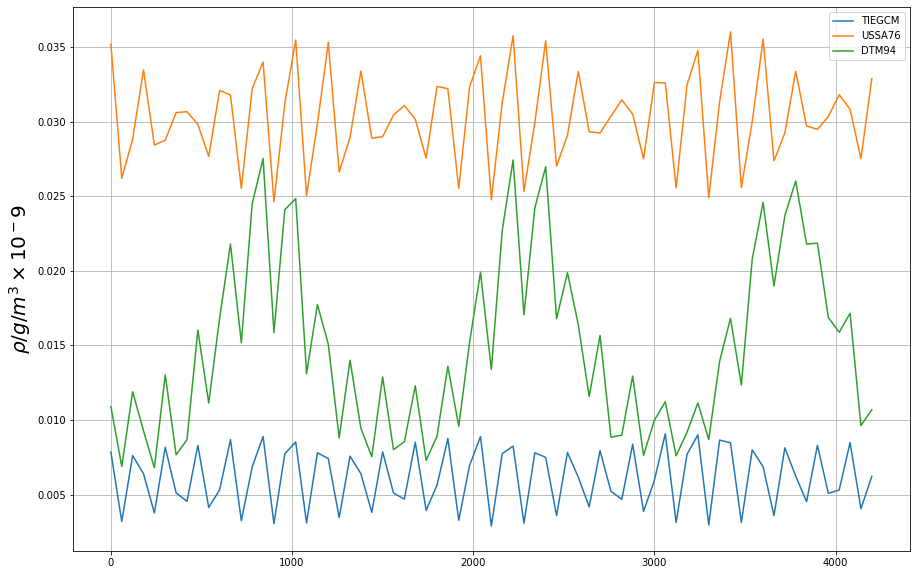

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(Path_Tie[0], rho_Tie, label = "TIEGCM")
plt.plot(Path_USSA76[0], rho_USSA76, label = "USSA76")
plt.plot(Path_DTM94[0], rho_DTM94, label = "DTM94")
plt.ylabel(r"$\rho/g/m^3\times10^-9$", size = 20)
plt.legend()
plt.plot()

In [28]:
day2 = nc.Dataset("DTM.2018164.nc")
day3 = nc.Dataset("DTM.2018165.nc")
print(day2["time"][:])

[   0.   15.   30.   45.   60.   75.   90.  105.  120.  135.  150.  165.
  180.  195.  210.  225.  240.  255.  270.  285.  300.  315.  330.  345.
  360.  375.  390.  405.  420.  435.  450.  465.  480.  495.  510.  525.
  540.  555.  570.  585.  600.  615.  630.  645.  660.  675.  690.  705.
  720.  735.  750.  765.  780.  795.  810.  825.  840.  855.  870.  885.
  900.  915.  930.  945.  960.  975.  990. 1005. 1020. 1035. 1050. 1065.
 1080. 1095. 1110. 1125. 1140. 1155. 1170. 1185. 1200. 1215. 1230. 1245.
 1260. 1275. 1290. 1305. 1320. 1335. 1350. 1365. 1380. 1395. 1410. 1425.]


In [29]:
T_DTM = [[],[],[]]
for item in Path_DTM[0]: #Correcting for fact that all days in DTM dataset start at T=0
    if item < 1440:
        T_DTM[0].append(item)
    elif item < 2880:
        T_DTM[1].append(item-1440)
    else:
        T_DTM[2].append(item-2880)


In [30]:
print(T_DTM)
print(Path_DTM[1][0], Path_DTM[2][0], Path_DTM[3][0])
dens_check = run_interpolation_general(day1, [0, 387, 0.08, 133], functions = [linear_int, linear_int, linear_int, linear_int])
print(dens_check)

[[0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0, 420.0, 480.0, 540.0, 600.0, 660.0, 720.0, 780.0, 840.0, 900.0, 960.0, 1020.0, 1080.0, 1140.0, 1200.0, 1260.0, 1320.0, 1380.0], [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0, 420.0, 480.0, 540.0, 600.0, 660.0, 720.0, 780.0, 840.0, 900.0, 960.0, 1020.0, 1080.0, 1140.0, 1200.0, 1260.0, 1320.0, 1380.0], [0.0, 60.0, 120.0, 180.0, 240.0, 300.0, 360.0, 420.0, 480.0, 540.0, 600.0, 660.0, 720.0, 780.0, 840.0, 900.0, 960.0, 1020.0, 1080.0, 1140.0, 1200.0, 1260.0, 1320.0]]
387.25961823055155 0.08390187905019755 312.7863203457253
[5.465995250227705e-16]


In [31]:
rho_DTM = []
#Obtain density from DTM along same satellite path as TIE_GCM
index = 0
#Run through each timeset with different days
for time in T_DTM[0]:
    dens = run_interpolation_general(day1, [time, Path_DTM[1][index], Path_DTM[2][index], Path_DTM[3][index]], functions = [linear_int, linear_int, linear_int, linear_int])
    rho_DTM.append(dens[0])
    index += 1

for time in T_DTM[1]:
    dens = run_interpolation_general(day2, [time, Path_DTM[1][index], Path_DTM[2][index], Path_DTM[3][index]], functions = [linear_int, linear_int, linear_int, linear_int])
    rho_DTM.append(dens[0])
    index += 1
    
for time in T_DTM[2]:
    dens = run_interpolation_general(day3, [time, Path_DTM[1][index], Path_DTM[2][index], Path_DTM[3][index]], functions = [linear_int, linear_int, linear_int, linear_int])
    rho_DTM.append(dens[0])
    index += 1
    
rho_DTM = np.array(rho_DTM)
rho_DTM = rho_DTM*1000
print(rho_DTM)
rho_DTM = rho_DTM/10**-9 #Keep units same as ODL output
print(rho_DTM)

[4.59130662e-13 4.18802000e-13 3.10805936e-13 5.09688331e-13
 4.85857840e-13 3.33989326e-13 5.18170883e-13 4.94721346e-13
 3.39005764e-13 4.26928709e-13 4.58607294e-13 3.03357549e-13
 3.99102369e-13 4.51248227e-13 3.59755333e-13 3.90725109e-13
 4.18095553e-13 4.26064637e-13 3.69314597e-13 3.34895410e-13
 4.56026526e-13 3.88127977e-13 2.82687098e-13 4.74948941e-13
 3.89414187e-13 2.49210319e-13 4.27990519e-13 4.01549102e-13
 2.46984965e-13 3.82537671e-13 4.19074192e-13 2.98508410e-13
 3.77759923e-13 4.25492883e-13 3.58756609e-13 3.76059446e-13
 3.47685198e-13 3.77992993e-13 3.22585424e-13 2.88485838e-13
 4.15073472e-13 3.37235050e-13 2.43083631e-13 4.29202202e-13
 3.64117031e-13 2.98823986e-13 4.85829283e-13 4.65785828e-13
 3.57114310e-13 4.99257795e-13 5.07747172e-13 3.68145685e-13
 4.42312385e-13 4.53557091e-13 4.10925909e-13 4.16885166e-13
 4.08656687e-13 4.68877728e-13 4.28712891e-13 3.71989831e-13
 5.08507815e-13 4.17668837e-13 3.09568657e-13 5.49281007e-13
 4.56178714e-13 3.054769

[]

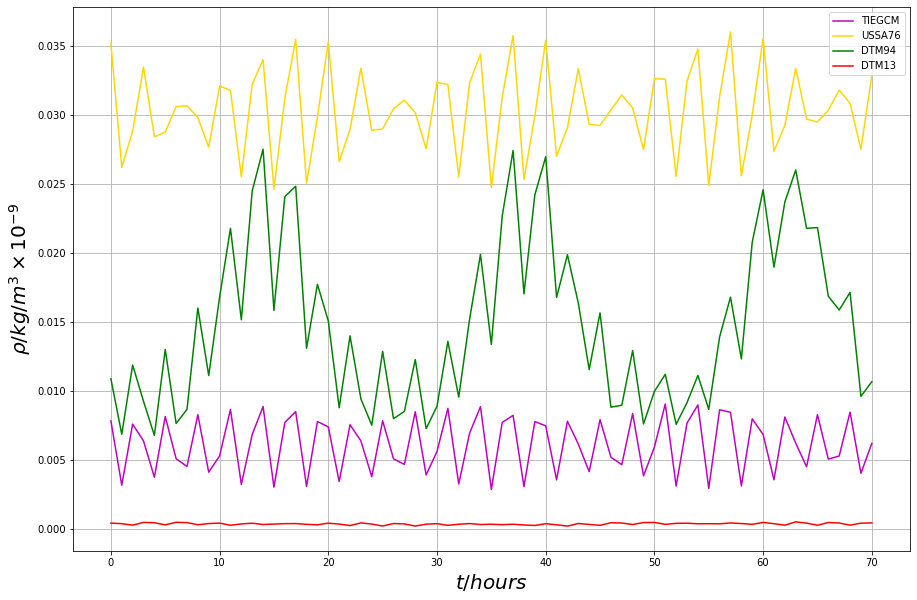

In [32]:
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(Path_Tie[0]/60, rho_Tie, label = "TIEGCM", c = "m")
plt.plot(Path_USSA76[0]/60, rho_USSA76, label = "USSA76", c = "gold")
plt.plot(Path_DTM94[0]/60, rho_DTM94, label = "DTM94", c = "g")
plt.plot(Path_DTM[0]/60, rho_DTM, label = "DTM13", c = "r")
plt.ylabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.xlabel(r"$t/hours$", size = 20)
plt.legend()
plt.plot()

[]

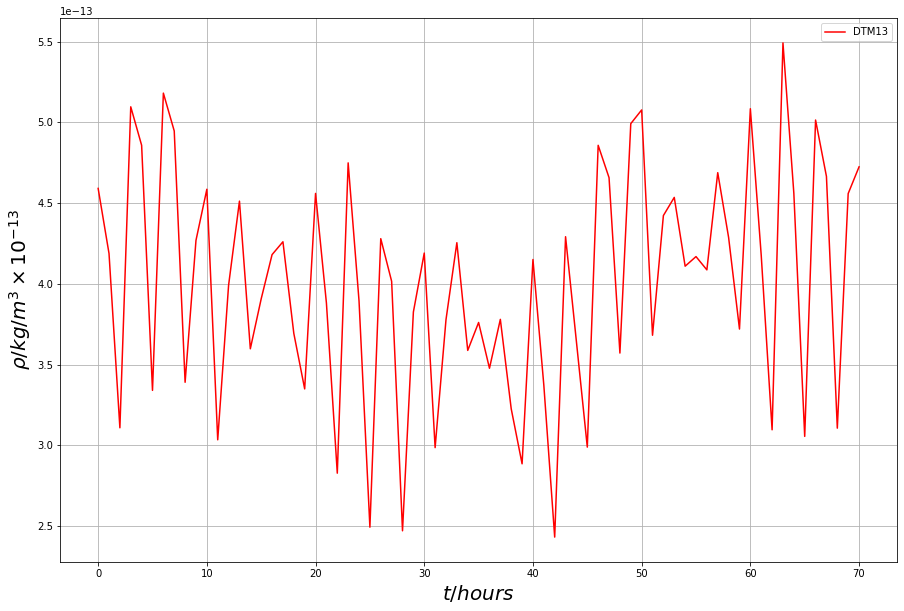

In [33]:
#Scale down DTM values again so they make sense
rho_DTM = rho_DTM * 10**-9
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(Path_DTM[0]/60, rho_DTM, label = "DTM13", c = "r")
plt.ylabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.xlabel(r"$t/hours$", size = 20)
plt.legend()
plt.plot()

Text(0.5, 0, '$longitude/\\degree$')

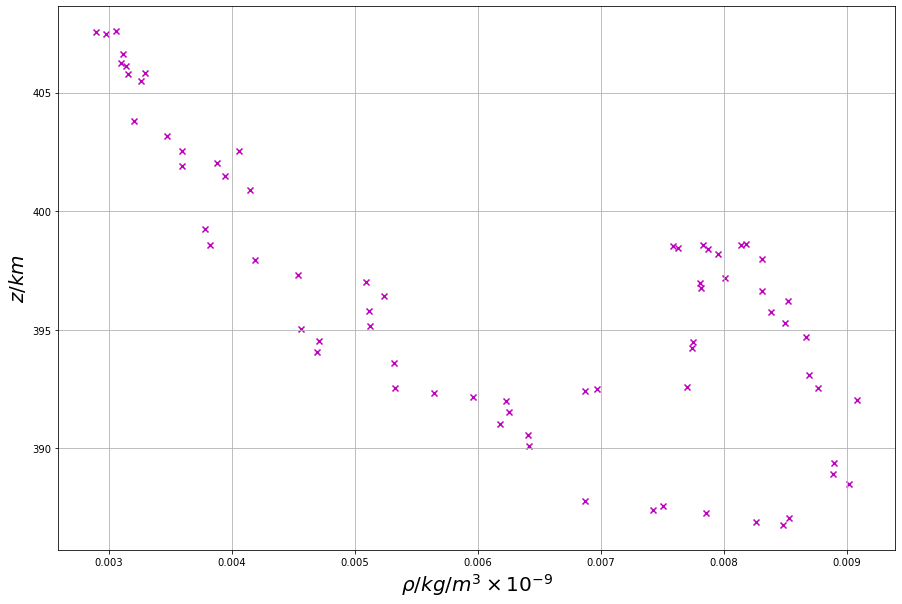

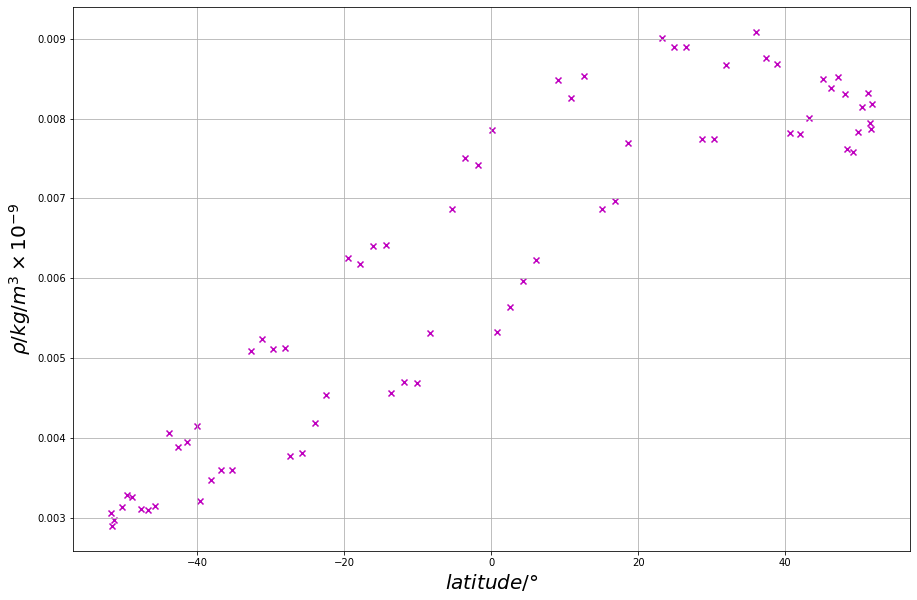

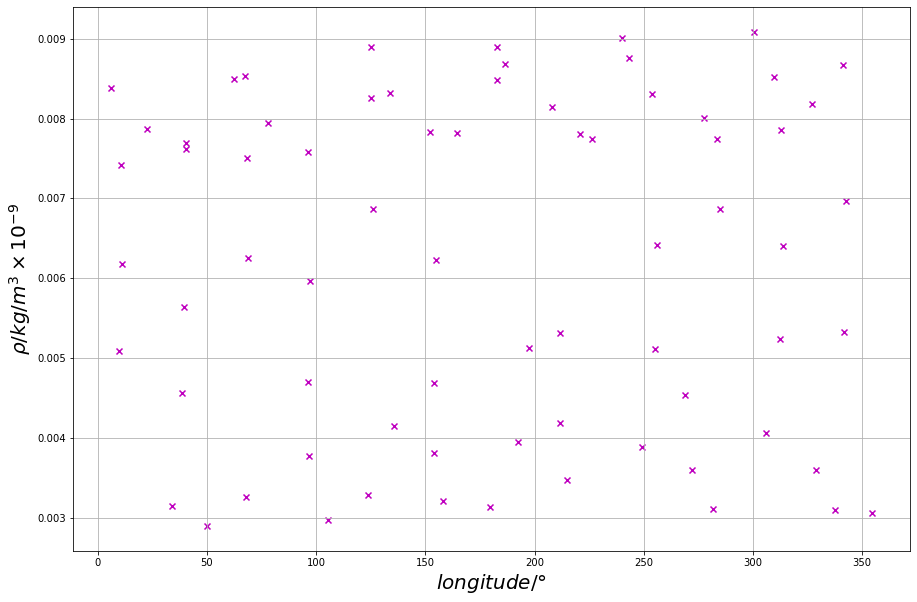

In [46]:
#Variation with altitude TIEGCM
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(rho_Tie, Path_Tie[1], label = "TIEGCM", c = "m", marker = "x")
plt.xlabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.ylabel(r"$z/km$", size = 20)
#Variation with latitude TIEGCM
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_Tie[2], rho_Tie, label = "TIEGCM", c = "m", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.xlabel(r"$latitude/\degree$", size = 20)
#Variation with longitude TIEGCM
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_Tie[3], rho_Tie, label = "TIEGCM", c = "m", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.xlabel(r"$longitude/\degree$", size = 20)

Text(0.5, 0, '$longitude/\\degree$')

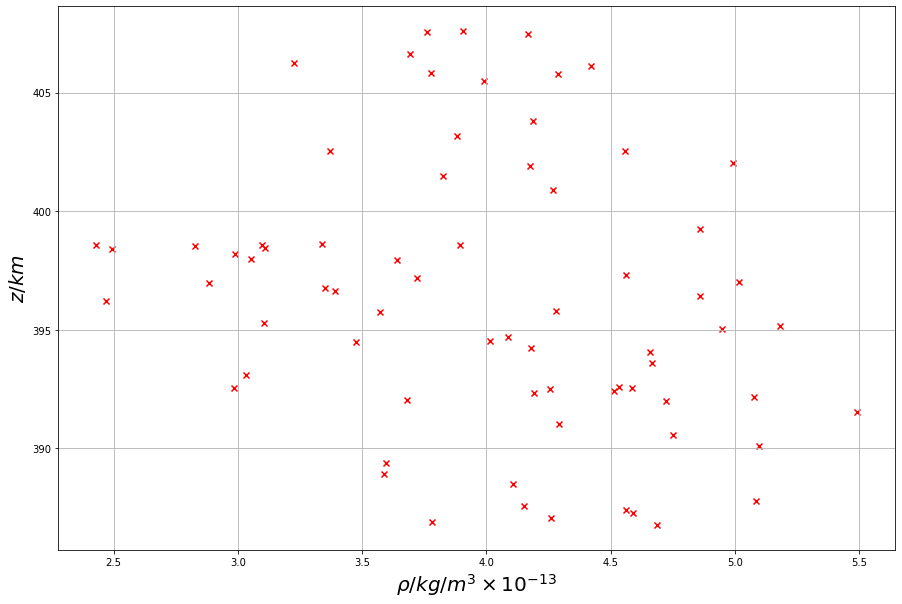

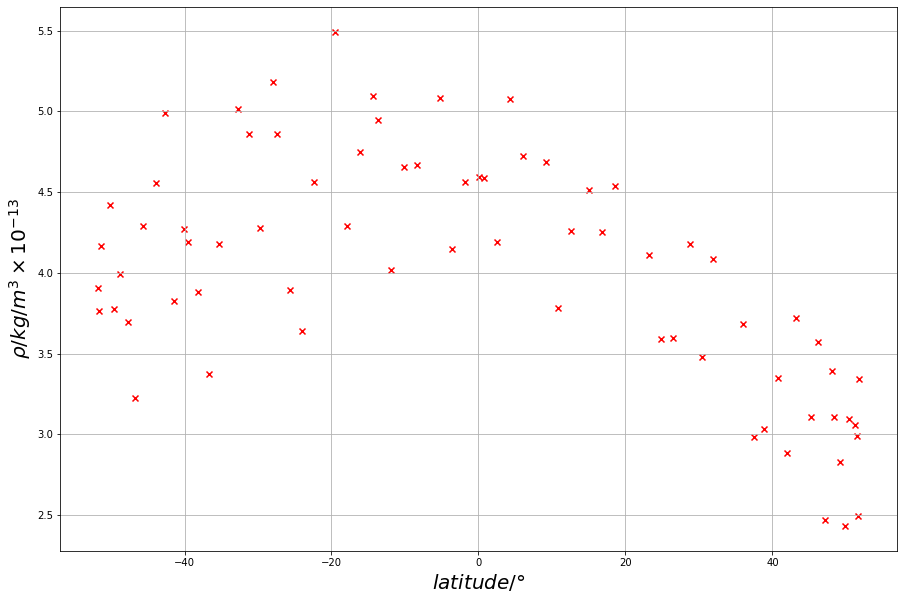

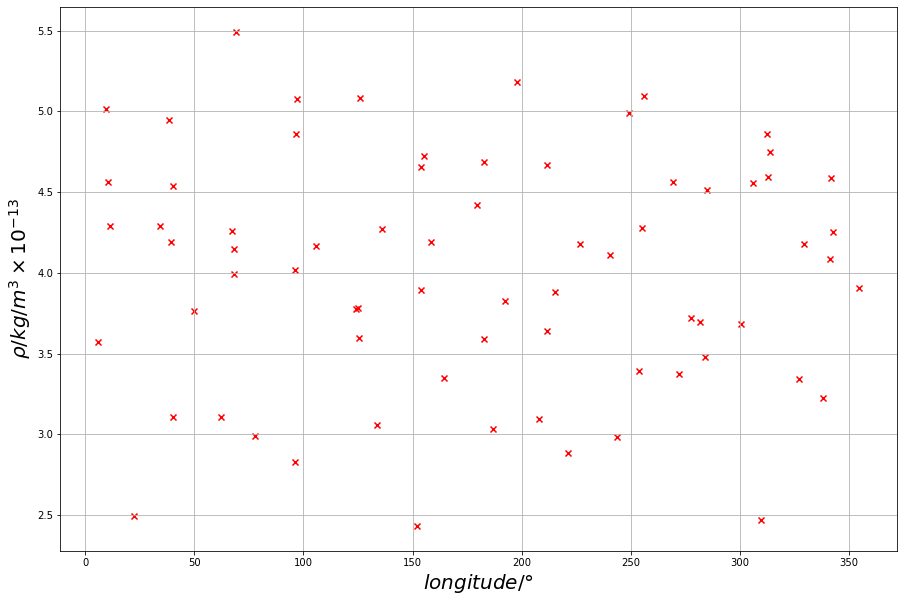

In [47]:
#Variation with z DTM13
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(rho_DTM, Path_DTM[1],  label = "DTM13", c = "r", marker = "x")
plt.xlabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.ylabel(r"$z/km$", size = 20)
#Variation with lat DTM13
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_DTM[2], rho_DTM, label = "DTM13", c = "r", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.xlabel(r"$latitude/\degree$", size = 20)
#Variation with lon DTM13
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_DTM[3], rho_DTM, label = "DTM13", c = "r", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.xlabel(r"$longitude/\degree$", size = 20)

In [36]:
Path_DTM13, rho_DTM94_xtra = get_data("dtm94_corrected.txt")

In [37]:
T_DTM13 = [[],[],[]]
for item in Path_DTM13[0]: #Correcting for fact that all days in DTM dataset start at T=0
    if item < 1440:
        T_DTM13[0].append(item)
    elif item < 2880:
        T_DTM13[1].append(item-1440)
    else:
        T_DTM13[2].append(item-2880)

In [38]:
rho_DTM13 = []
#Obtain density from DTM along same satellite path as DTM
index = 0
#Run through each timeset with different days
for time in T_DTM13[0]:
    dens = run_interpolation_general(day1, [time, Path_DTM13[1][index], Path_DTM13[2][index], Path_DTM13[3][index]], functions = [linear_int, linear_int, linear_int, linear_int])
    rho_DTM13.append(dens[0])
    index += 1

for time in T_DTM[1]:
    dens = run_interpolation_general(day2, [time, Path_DTM13[1][index], Path_DTM13[2][index], Path_DTM13[3][index]], functions = [linear_int, linear_int, linear_int, linear_int])
    rho_DTM13.append(dens[0])
    index += 1
    
for time in T_DTM[2]:
    dens = run_interpolation_general(day3, [time, Path_DTM13[1][index], Path_DTM13[2][index], Path_DTM13[3][index]], functions = [linear_int, linear_int, linear_int, linear_int])
    rho_DTM13.append(dens[0])
    index += 1
    
rho_DTM13 = np.array(rho_DTM13)
rho_DTM13 = rho_DTM13*1000
print(rho_DTM13)
rho_DTM13 = rho_DTM13/10**-9 #Keep units same as ODL output
print(rho_DTM13)

[4.59130662e-13 4.18821323e-13 3.10834734e-13 5.09764184e-13
 4.85974461e-13 3.34090186e-13 5.18351097e-13 4.94928480e-13
 3.39196000e-13 4.27149061e-13 4.59001225e-13 3.03680462e-13
 3.99572511e-13 4.52016578e-13 3.60361421e-13 3.91498416e-13
 4.19235135e-13 4.26973082e-13 3.70180375e-13 3.36095464e-13
 4.57163210e-13 3.89016123e-13 2.83850847e-13 4.76365086e-13
 3.90832455e-13 2.50195738e-13 4.29710166e-13 4.02965278e-13
 2.47801795e-13 3.83703797e-13 4.20599044e-13 2.99292929e-13
 3.79163618e-13 4.27330603e-13 3.59680172e-13 3.77604354e-13
 3.49857383e-13 3.79189849e-13 3.23941860e-13 2.90849719e-13
 4.16872746e-13 3.38593732e-13 2.45264839e-13 4.31804184e-13
 3.66455473e-13 3.00981871e-13 4.89712192e-13 4.68972989e-13
 3.59064528e-13 5.02054500e-13 5.11355447e-13 3.69640134e-13
 4.45148630e-13 4.57290584e-13 4.12409676e-13 4.19592993e-13
 4.12967991e-13 4.70698401e-13 4.31440213e-13 3.76502916e-13
 5.11153892e-13 4.20024232e-13 3.13351052e-13 5.53555996e-13
 4.60060064e-13 3.085943

[]

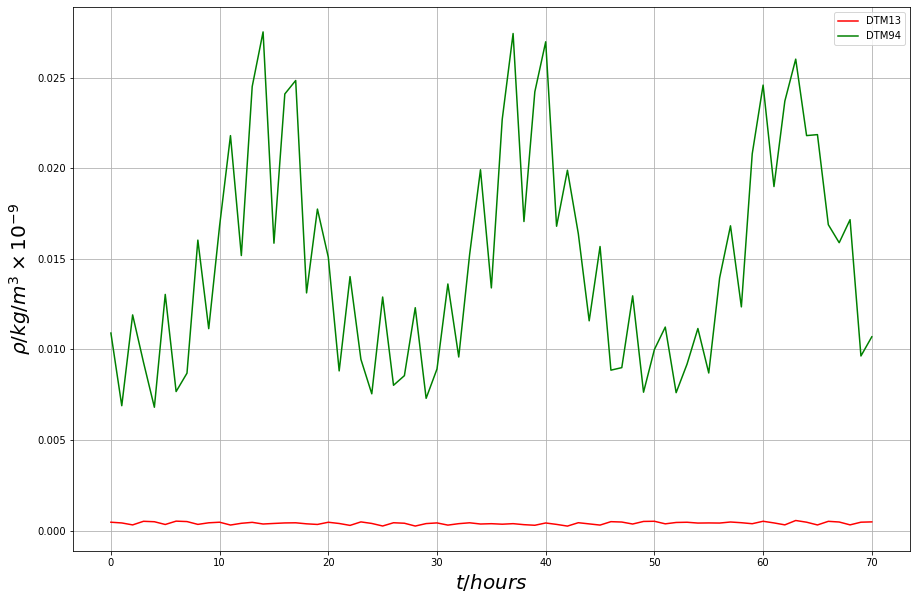

In [39]:
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(Path_DTM13[0]/60, rho_DTM13, label = "DTM13", c = "r")
plt.plot(Path_DTM94[0]/60, rho_DTM94, label = "DTM94", c = "g")
plt.ylabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.xlabel(r"$t/hours$", size = 20)
plt.legend()
plt.plot()

[]

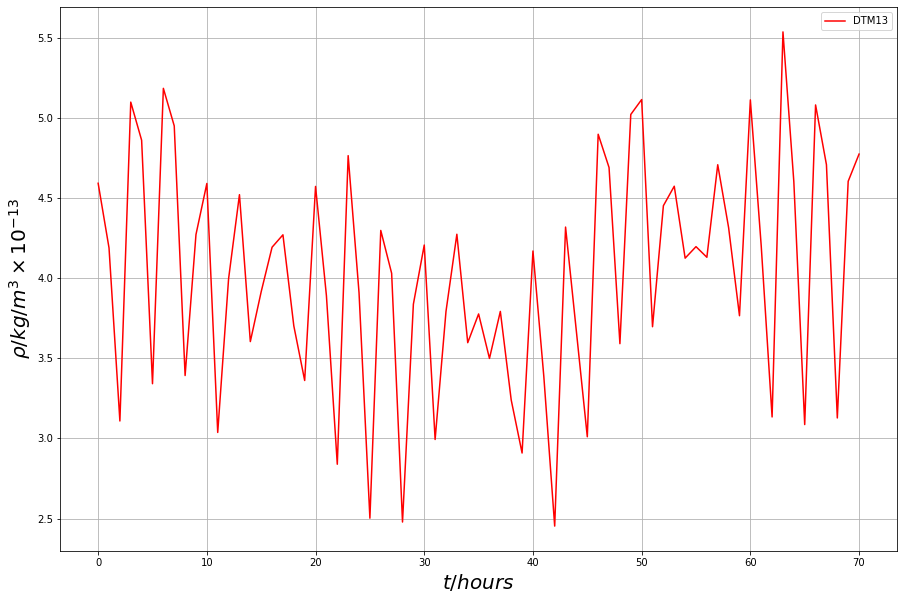

In [40]:
#REscale values
rho_DTM13 = rho_DTM13*10**4
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(Path_DTM13[0]/60, rho_DTM13, label = "DTM13", c = "r")
plt.ylabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.xlabel(r"$t/hours$", size = 20)
plt.legend()
plt.plot()

Text(0.5, 0, '$longitude/\\degree$')

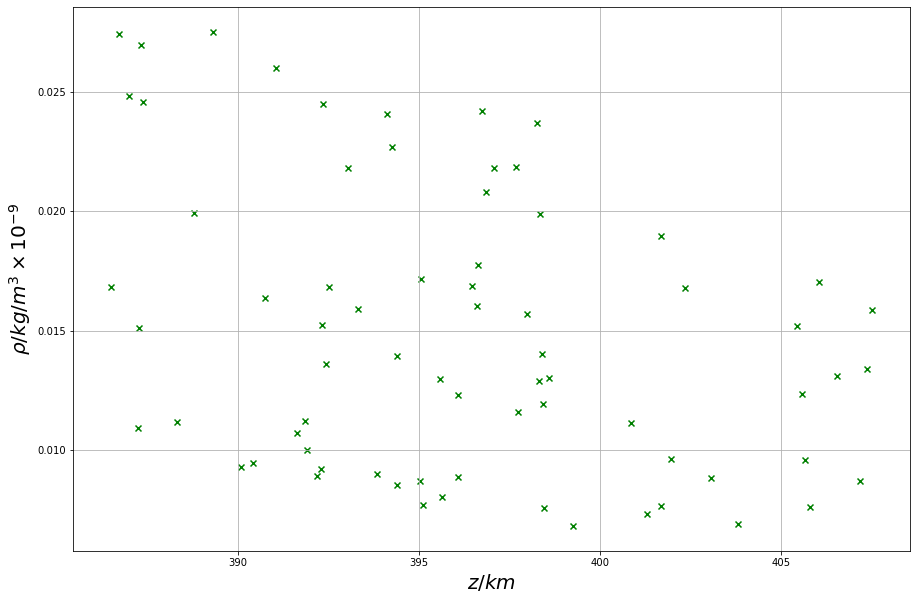

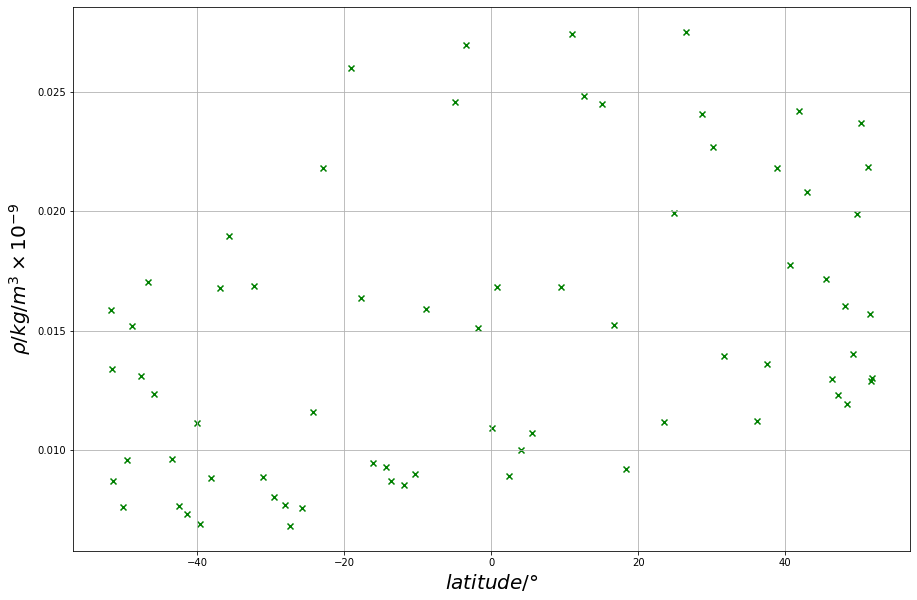

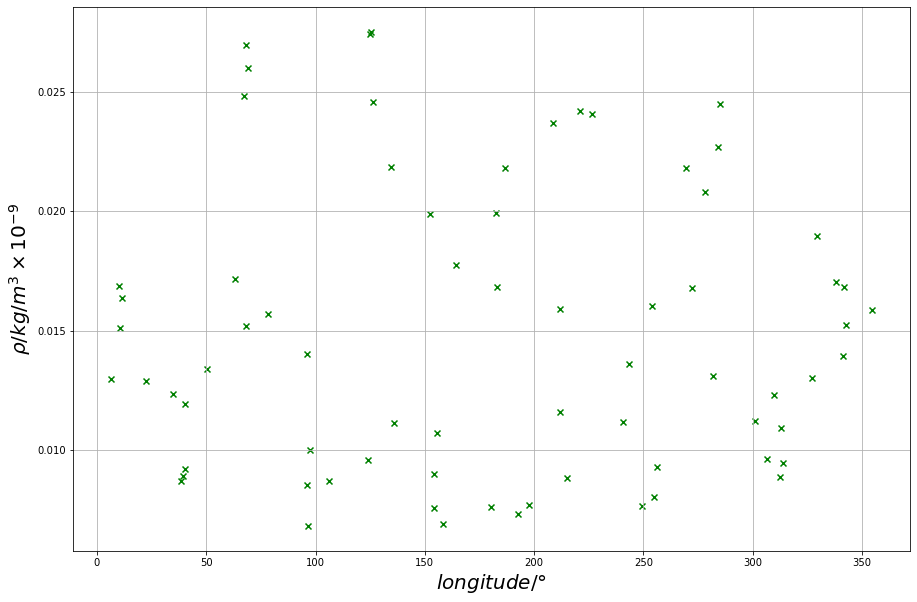

In [48]:
#Variation with altitude DTM94
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_DTM94[1], rho_DTM94, label = "DTM94", c = "g", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.xlabel(r"$z/km$", size = 20)
#Variation with latitude DTM94
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_DTM94[2], rho_DTM94, label = "DTM94", c = "g", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.xlabel(r"$latitude/\degree$", size = 20)
#Variation with longitude DTM94
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_DTM94[3], rho_DTM94, label = "DTM94", c = "g", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-9}$", size = 20)
plt.xlabel(r"$longitude/\degree$", size = 20)

Text(0.5, 0, '$longitude/\\degree$')

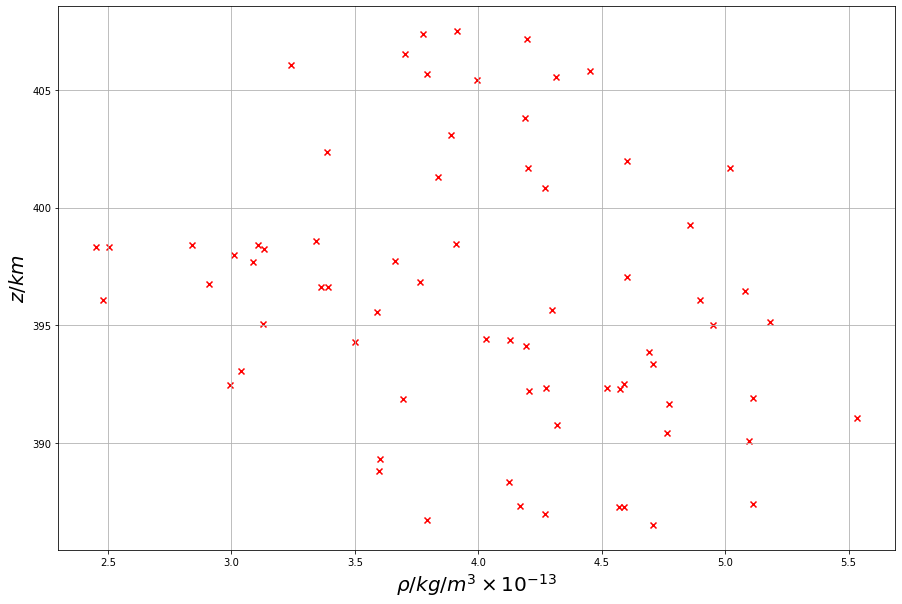

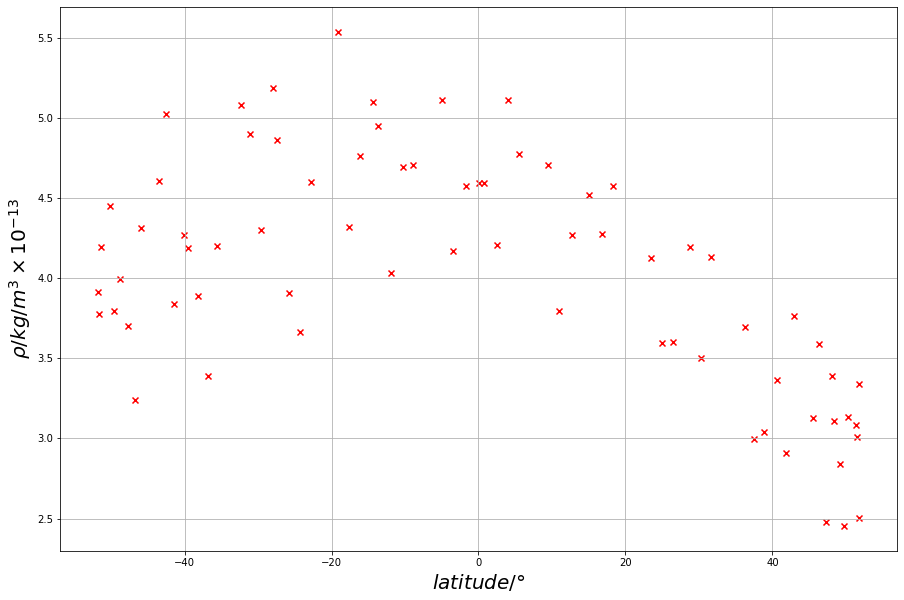

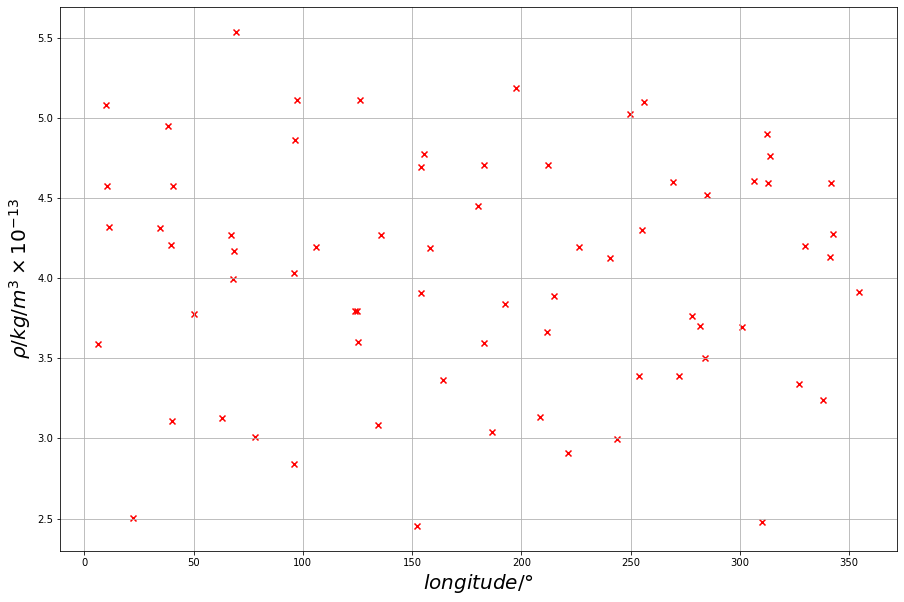

In [49]:
#Variation with altitude DTM13
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(rho_DTM13, Path_DTM13[1], label = "DTM13", c = "r", marker = "x")
plt.xlabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.ylabel(r"$z/km$", size = 20)
#Variation with latitude DTM13
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_DTM13[2], rho_DTM13, label = "DTM13", c = "r", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.xlabel(r"$latitude/\degree$", size = 20)
#Variation with longitude DTM13
plt.figure(figsize = (15, 10))
plt.grid()
plt.scatter(Path_DTM13[3], rho_DTM13, label = "DTM13", c = "r", marker = "x")
plt.ylabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.xlabel(r"$longitude/\degree$", size = 20)

[]

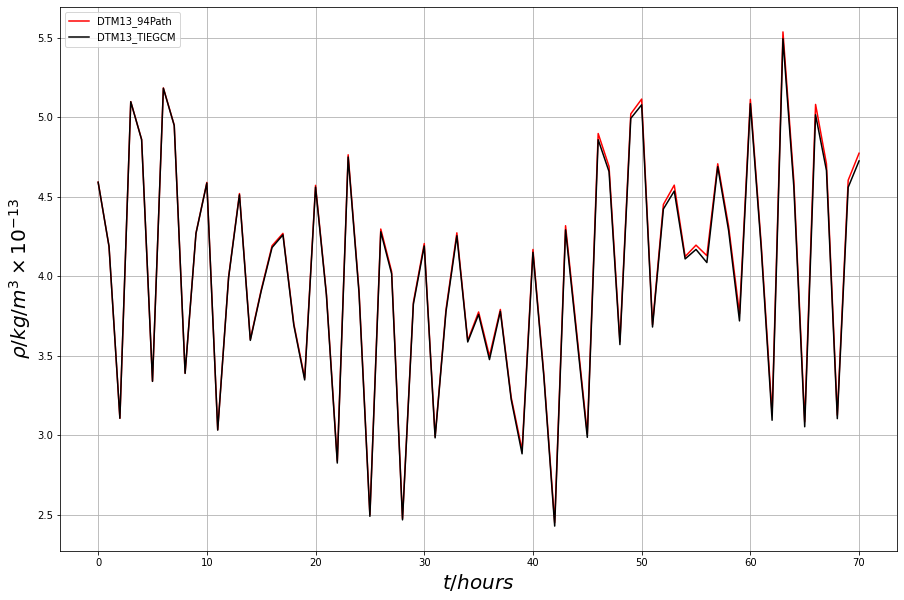

In [43]:
rho_DTM = rho_DTM * 10**13
plt.figure(figsize = (15, 10))
plt.grid()
plt.plot(Path_DTM13[0]/60, rho_DTM13, label = "DTM13_94Path", c = "r")
plt.plot(Path_DTM[0]/60, rho_DTM, label = "DTM13_TIEGCM", c = "k")
plt.ylabel(r"$\rho/kg/m^3\times10^{-13}$", size = 20)
plt.xlabel(r"$t/hours$", size = 20)
plt.legend()
plt.plot()

In [50]:
print(Path_DTM[0])

[   0.   60.  120.  180.  240.  300.  360.  420.  480.  540.  600.  660.
  720.  780.  840.  900.  960. 1020. 1080. 1140. 1200. 1260. 1320. 1380.
 1440. 1500. 1560. 1620. 1680. 1740. 1800. 1860. 1920. 1980. 2040. 2100.
 2160. 2220. 2280. 2340. 2400. 2460. 2520. 2580. 2640. 2700. 2760. 2820.
 2880. 2940. 3000. 3060. 3120. 3180. 3240. 3300. 3360. 3420. 3480. 3540.
 3600. 3660. 3720. 3780. 3840. 3900. 3960. 4020. 4080. 4140. 4200.]
